Fibonacci Graph Notebook
* Replicates a sunflower seed head

Tutor:
* Anthropic's AI Claude

Python script that visualizes the Fibonacci spiral pattern found in sunflower seed heads, also known as phyllotaxis. This pattern is based on the golden angle (approximately 137.5 degrees).

Here's what makes it special:

1. It uses the golden angle (approximately 137.5 degrees) to position each seed, which is the key to creating the natural spiral pattern
2. The visualization includes both the individual seeds (brown dots) and the highlighted spiral arms (colored lines)
3. By default, it shows 34 spiral arms (a Fibonacci number) which matches patterns commonly found in nature
4. The script is modular and well-documented, making it easy to modify parameters like the number of seeds or spiral arms

To run the script, you'll need Python with numpy and matplotlib installed. The visualization will show both the individual seeds and the emerging spiral patterns that characterize sunflower seed heads.


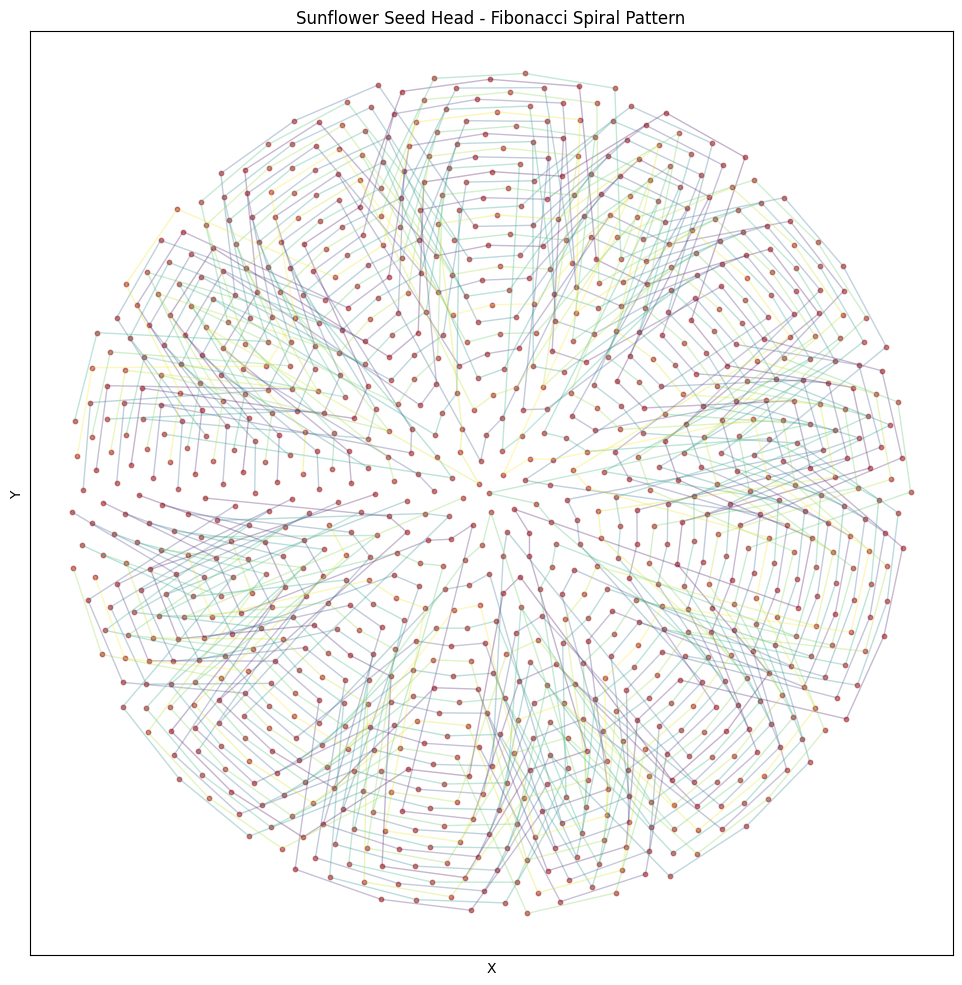

In [1]:
"""
Abstract:
This script generates a visualization of the Fibonacci spiral pattern commonly found in sunflower seed heads,
demonstrating the phenomenon of phyllotaxis. The pattern is created by placing points (seeds) at positions
determined by the golden angle (approximately 137.5 degrees) and increasing radii. This arrangement
naturally creates visible spiral arms that follow the Fibonacci sequence, maximizing the packing efficiency
of seeds in the flower head.

The visualization uses matplotlib to plot points in a polar coordinate system, with each point representing
a seed. The spiral arms are highlighted by connecting points that share similar angular positions,
creating the characteristic Fibonacci spiral pattern.

Author: Claude
Date: January 28, 2025
"""

import numpy as np
import matplotlib.pyplot as plt

def generate_sunflower_points(num_points):
    """
    Generate points for the sunflower pattern using the golden angle.

    Args:
        num_points (int): Number of points (seeds) to generate

    Returns:
        tuple: Arrays of (x, y) coordinates for each point
    """
    # Golden angle in radians (approximately 137.5 degrees)
    golden_angle = np.pi * (3 - np.sqrt(5))

    # Generate angles and radii
    theta = np.arange(num_points) * golden_angle
    radius = np.sqrt(np.arange(num_points))

    # Convert polar coordinates to Cartesian
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    return x, y

def highlight_fibonacci_spirals(x, y, num_spirals=34):
    """
    Create spiral arm paths by connecting points with similar angular positions.

    Args:
        x (array): x-coordinates of points
        y (array): y-coordinates of points
        num_spirals (int): Number of spiral arms to highlight (default is 34, a Fibonacci number)

    Returns:
        list: List of (x, y) coordinate pairs for each spiral arm
    """
    spiral_arms = []
    points = list(zip(x, y))

    # Sort points by their angular position
    angles = np.arctan2(y, x)
    sorted_indices = np.argsort(angles)

    # Group points into spiral arms
    for i in range(num_spirals):
        arm = []
        for j in range(i, len(points), num_spirals):
            if j < len(sorted_indices):
                idx = sorted_indices[j]
                arm.append((x[idx], y[idx]))
        spiral_arms.append(arm)

    return spiral_arms

def plot_sunflower(num_points=1000, num_spirals=34):
    """
    Create the complete sunflower visualization with highlighted spiral arms.

    Args:
        num_points (int): Number of points to generate
        num_spirals (int): Number of spiral arms to highlight
    """
    # Set up the plot
    plt.figure(figsize=(12, 12))
    plt.gca().set_aspect('equal')

    # Generate and plot points
    x, y = generate_sunflower_points(num_points)
    plt.scatter(x, y, c='brown', s=10, alpha=0.6, label='Seeds')

    # Generate and plot spiral arms
    spiral_arms = highlight_fibonacci_spirals(x, y, num_spirals)
    colors = plt.cm.viridis(np.linspace(0, 1, num_spirals))

    # Plot each spiral arm with a different color
    for arm, color in zip(spiral_arms, colors):
        if len(arm) > 1:
            arm_x, arm_y = zip(*arm)
            plt.plot(arm_x, arm_y, '-', color=color, alpha=0.3, linewidth=1)

    # Customize the plot
    plt.title('Sunflower Seed Head - Fibonacci Spiral Pattern')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)

    # Remove axis ticks for cleaner visualization
    plt.xticks([])
    plt.yticks([])

    plt.show()

if __name__ == "__main__":
    # Create the visualization with 1000 points and 34 spiral arms
    # (34 is a Fibonacci number: 1, 1, 2, 3, 5, 8, 13, 21, 34, ...)
    plot_sunflower(num_points=1000, num_spirals=34)